# `SGD neural net`

In [1]:
import numpy as np
from numpy.linalg import norm
import random
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

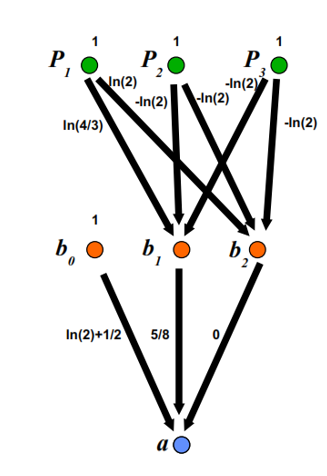

# Q1

## Part a

$$
P = (1,1,1)^T \\
\\[10pt]
X_1 = \ln\left(\frac{4}{3}\right) - \ln 2 - \ln 2, \quad  X_2 = -\ln 2 - \ln 2 + \ln 2 \\
\\[10pt]
b_1 = \tanh(X_1) = -0.8,  \quad b_2 = \tanh(X_2) = -0.6 \\
\\[10pt]
Z = \frac{5}{8} \cdot (-0.8) + \ln 2 + 0.5 = \ln 2 \\
\\[10pt]
a = \tanh(Z) = 0.6
$$


***

## Part b

Real value: $y_0 = -1$

$\eta = 1$

a = 0.6

*First update:*

$$
\epsilon = \frac{1}{2} (tanh(Z) - y_0) = \frac{1}{2} (tanh(w_1 \cdot tanh(X_1) + w_2 \cdot tanh(X_2) + w_0) - y_0)^2
\\[10pt]
\frac{\partial \epsilon}{\partial w_0} = (tanh(Z)- y_0) \cdot (1-tanh(Z)^2) \cdot 1
\\[10pt]
\frac{\partial \epsilon}{\partial w_2} = (tanh(Z)- y_0) \cdot (1-tanh(Z)^2) \cdot tanh(X_2)
\\[10pt]
\frac{\partial \epsilon}{\partial w_1} = (tanh(Z)- y_0) \cdot (1-tanh(Z)^2) \cdot tanh(X_1)
\\[15pt]
\text{Now, Let's update the weights:}
\\[10pt]
w_1^{t+1} = w_1^t - \eta \cdot \frac{\partial \epsilon}{\partial w_1} \Rightarrow \quad w_1^{(1)} =  w_1^{(0)} - \eta \cdot \frac{\partial \epsilon}{\partial w_1} = 5/8 - 1 \cdot (0.6 + 1) \cdot (1-0.6^2) \cdot (-0.8) = 1.442
\\[10pt]
w_2^{t+1} = w_2^t - \eta \cdot \frac{\partial \epsilon}{\partial w_2} \Rightarrow \quad w_2^{(1)} =  w_2^{(0)} - \eta \cdot \frac{\partial \epsilon}{\partial w_2} =  0 - 1 \cdot (0.6 + 1) \cdot (1-0.6^2) \cdot (-0.6) = 0.6144
\\[10pt]
w_0^{t+1} = w_0^t - \eta \cdot \frac{\partial \epsilon}{\partial w_0} \Rightarrow \quad w_0^{(1)} =  w_0^{(0)} - \eta \cdot \frac{\partial \epsilon}{\partial w_0} =  ln(2) + 0.5 - 1 \cdot (0.6 + 1) \cdot (1-0.6^2) \cdot 1 = 0.169
$$



***

# Q3

We're implementing an SGD neural net for approximating the renown matlab Peaks function, We've added a constant neuron to the input.

We ran this model 100 times to find the lowest error 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def peaks(x, y):
    term1 = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
    term2 = -10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term3 = -1/3 * np.exp(-(x + 1)**2 - y**2)
    return term1 + term2 + term3

# Generate a grid of points
A = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(A, A)
Z = peaks(X, Y)

# Flatten the grid and sample 1000 points
data = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))
np.random.shuffle(data)
sample_size = 1000
train_data = data[:sample_size]
X_train = train_data[:, 0:2]  # Inputs: x and y
y_train = train_data[:, 2]     # Outputs: z

# Add bias term to inputs
X_train = np.hstack((X_train, np.ones((sample_size, 1))))  # Adding a bias input

# Initialize neural network parameters
np.random.seed(42)  # For reproducibility

input_size = 3       # 2 inputs + 1 bias
hidden_size = 100    # Number of neurons in the hidden layer
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.1  # Input to Hidden
W2 = np.random.randn(hidden_size, output_size) * 0.1 # Hidden to Output

# Activation functions
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Training parameters
eta = 0.001          # Learning rate
iterations = 1000000 # Total number of training steps
sample_interval = 1000  # Interval to record error

# To store error history
error_history = []
steps = []

for step in range(1, iterations + 1):
    # Randomly select a single sample
    idx = np.random.randint(0, sample_size)
    x_sample = X_train[idx]
    y_sample = y_train[idx]

    # Forward pass
    z1 = np.dot(x_sample, W1)      # Input to Hidden (includes bias)
    a1 = tanh(z1)                   # Activation Hidden
    z2 = np.dot(a1, W2)             # Hidden to Output
    a2 = z2                         # Linear activation for output

    # Compute error (Mean Squared Error)
    error = 0.5 * (a2 - y_sample)**2

    # Backward pass
    delta2 = (a2 - y_sample)        # Derivative of MSE w.r. to a2
    dW2 = a1[:, np.newaxis] * delta2  # Gradient for W2

    delta1 = (delta2 * W2.flatten()) * tanh_derivative(z1)  # Gradient for hidden layer
    dW1 = np.outer(x_sample, delta1)    # Gradient for W1

    # Update weights
    W2 -= eta * dW2.reshape(W2.shape)
    W1 -= eta * dW1

    # Record error at specified intervals
    if step % sample_interval == 0:
        # Compute total error on the training set
        z1_train = np.dot(X_train, W1)
        a1_train = tanh(z1_train)
        z2_train = np.dot(a1_train, W2)
        a2_train = z2_train.flatten()
        total_error = 0.5 * np.mean((a2_train - y_train)**2)
        error_history.append(total_error)
        steps.append(step)
        if step % (sample_interval * 100) == 0:
            print(f"Step {step}, Error: {total_error}")

# The rest of the plotting code remains the same


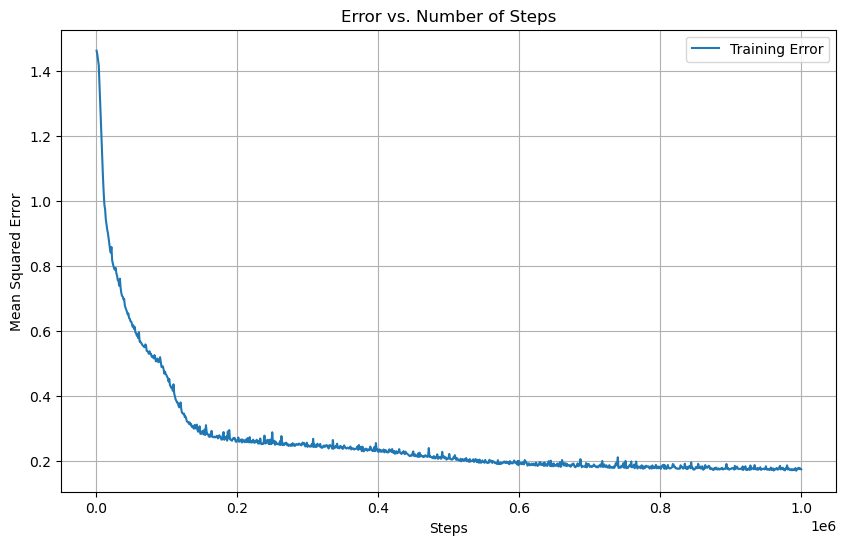

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(steps, error_history, label='Training Error')
plt.xlabel('Steps')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Number of Steps')
plt.legend()
plt.grid(True)
plt.show()


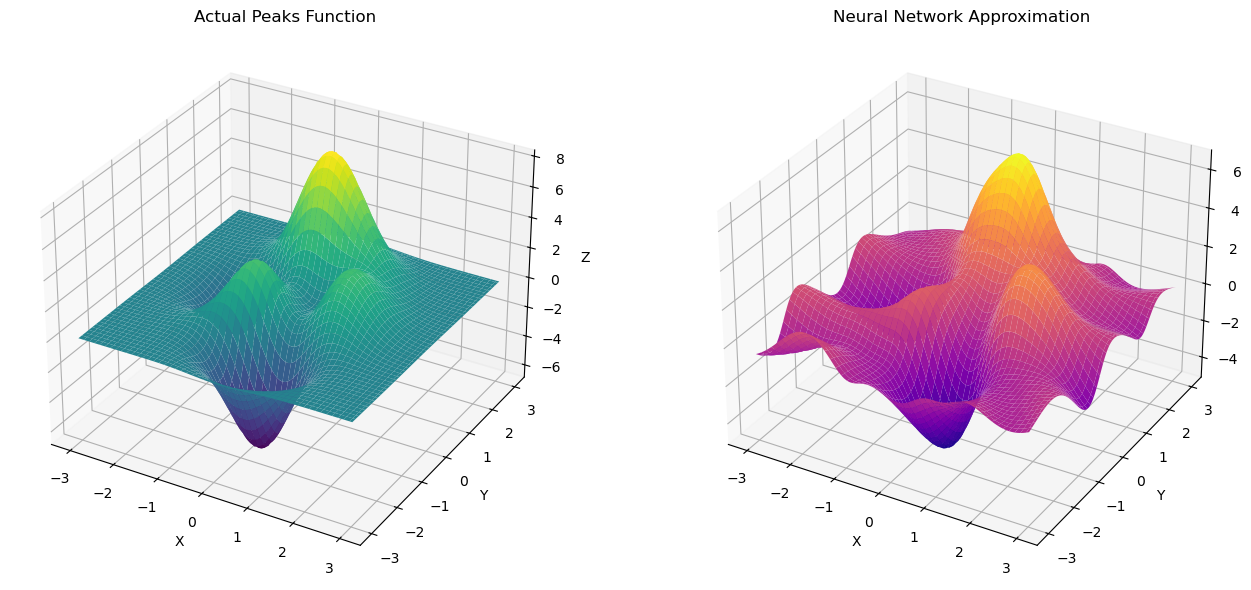

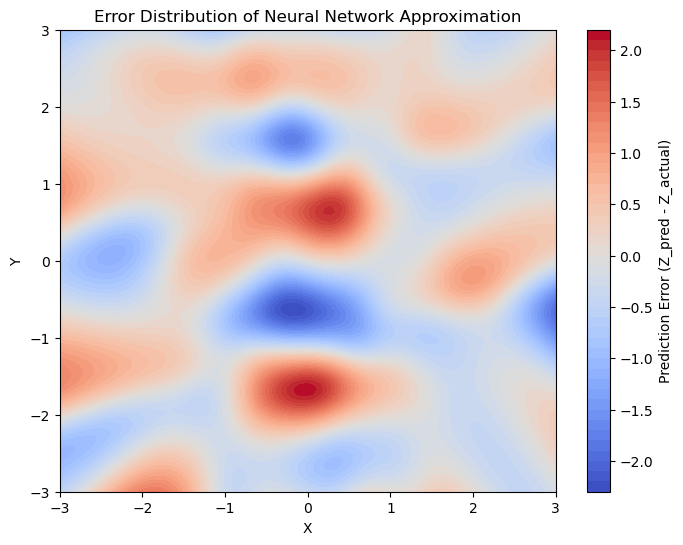

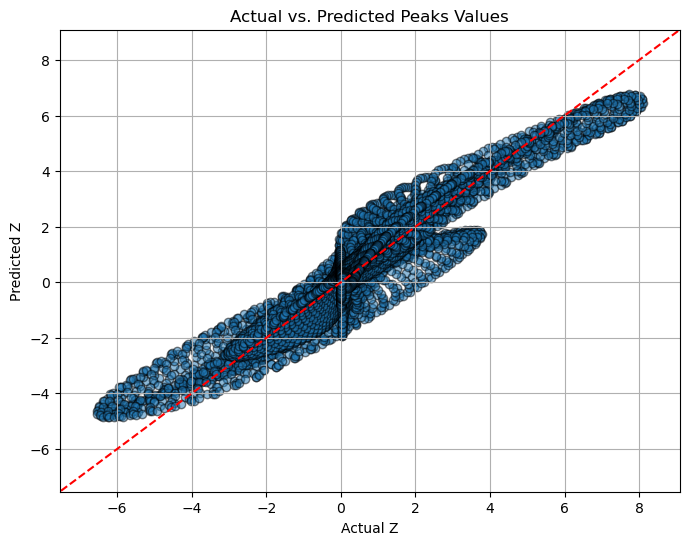

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def peaks(x, y):
    term1 = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
    term2 = -10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term3 = -1/3 * np.exp(-(x + 1)**2 - y**2)
    return term1 + term2 + term3

# Create a dense grid for visualization
grid_size = 100
X_grid, Y_grid = np.meshgrid(np.linspace(-3, 3, grid_size), np.linspace(-3, 3, grid_size))
Z_actual = peaks(X_grid, Y_grid)

# Prepare inputs with bias term (constant 1)
X_flat = X_grid.flatten()
Y_flat = Y_grid.flatten()
bias = np.ones_like(X_flat)  # Bias term
inputs = np.column_stack((X_flat, Y_flat, bias))  # Shape: (grid_size**2, 3)

# Forward pass for all inputs without separate bias vectors
z1_grid = np.dot(inputs, W1)       # Shape: (grid_size**2, 100)
a1_grid = np.tanh(z1_grid)        # Activation Hidden
z2_grid = np.dot(a1_grid, W2)     # Shape: (grid_size**2, 1)
Z_pred = z2_grid.reshape(X_grid.shape)  # Shape: (grid_size, grid_size)

# Plot Actual Peaks
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X_grid, Y_grid, Z_actual, cmap='viridis')
ax1.set_title('Actual Peaks Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot Neural Network Approximation
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X_grid, Y_grid, Z_pred, cmap='plasma')
ax2.set_title('Neural Network Approximation')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

# Compute error on the grid
error_grid = Z_pred - Z_actual

# Plot Error Distribution
plt.figure(figsize=(8, 6))
contour = plt.contourf(X_grid, Y_grid, error_grid, levels=50, cmap='coolwarm')
plt.colorbar(contour, label='Prediction Error (Z_pred - Z_actual)')
plt.title('Error Distribution of Neural Network Approximation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(Z_actual.flatten(), Z_pred.flatten(), alpha=0.5, edgecolor='k')
plt.xlabel('Actual Z')
plt.ylabel('Predicted Z')
plt.title('Actual vs. Predicted Peaks Values')
plt.plot([-10, 10], [-10, 10], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.xlim(min(Z_actual.min(), Z_pred.min()) - 1, max(Z_actual.max(), Z_pred.max()) + 1)
plt.ylim(min(Z_actual.min(), Z_pred.min()) - 1, max(Z_actual.max(), Z_pred.max()) + 1)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def peaks(x, y):
    term1 = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
    term2 = -10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term3 = -1/3 * np.exp(-(x + 1)**2 - y**2)
    return term1 + term2 + term3

def initialize_weights(input_size, hidden_size, output_size):
    """
    Initializes the weights for the neural network.
    
    Parameters:
        input_size (int): Number of input neurons (including bias).
        hidden_size (int): Number of neurons in the hidden layer.
        output_size (int): Number of output neurons.
        
    Returns:
        W1 (ndarray): Weights from input to hidden layer.
        W2 (ndarray): Weights from hidden to output layer.
    """
    W1 = np.random.randn(input_size, hidden_size) * 0.1  # Input to Hidden
    W2 = np.random.randn(hidden_size, output_size) * 0.1 # Hidden to Output
    return W1, W2

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_pass(x, W1, W2):
    """
    Performs the forward pass of the neural network.
    
    Parameters:
        x (ndarray): Input vector (including bias).
        W1 (ndarray): Weights from input to hidden layer.
        W2 (ndarray): Weights from hidden to output layer.
        
    Returns:
        a1 (ndarray): Activation from hidden layer.
        a2 (float): Output of the network.
    """
    z1 = np.dot(x, W1)      # Input to Hidden
    a1 = tanh(z1)           # Activation Hidden
    z2 = np.dot(a1, W2)     # Hidden to Output
    a2 = z2                  # Linear activation for output
    return a1, a2

def backward_pass(x, y, a1, a2, W2):
    """
    Performs the backward pass and computes gradients.
    
    Parameters:
        x (ndarray): Input vector (including bias).
        y (float): True output value.
        a1 (ndarray): Activation from hidden layer.
        a2 (float): Predicted output.
        W2 (ndarray): Weights from hidden to output layer.
        
    Returns:
        dW1 (ndarray): Gradient for W1.
        dW2 (ndarray): Gradient for W2.
    """
    # Compute the error derivative w.r.t output
    delta2 = a2 - y  # Shape: scalar
    
    # Gradient for W2
    dW2 = a1[:, np.newaxis] * delta2  # Shape: (hidden_size, output_size)
    
    # Backpropagate to hidden layer
    delta1 = (delta2 * W2.flatten()) * tanh_derivative(np.dot(x, W1))  # Shape: (hidden_size,)
    
    # Gradient for W1
    dW1 = np.outer(x, delta1)  # Shape: (input_size, hidden_size)
    
    return dW1, dW2

def train_network(X_train, y_train, hidden_size=100, eta=0.001, iterations=1000000, sample_interval=1000):
    """
    Trains the neural network using Stochastic Gradient Descent.
    
    Parameters:
        X_train (ndarray): Training inputs (including bias).
        y_train (ndarray): Training outputs.
        hidden_size (int): Number of neurons in the hidden layer.
        eta (float): Learning rate.
        iterations (int): Number of training iterations.
        sample_interval (int): Interval to record error.
        
    Returns:
        W1 (ndarray): Trained weights from input to hidden layer.
        W2 (ndarray): Trained weights from hidden to output layer.
        error_history (list): Recorded training errors.
        steps (list): Steps at which errors were recorded.
    """
    input_size = X_train.shape[1]  # 3 (x, y, bias)
    output_size = 1
    
    # Initialize weights
    W1, W2 = initialize_weights(input_size, hidden_size, output_size)
    
    # To store error history
    error_history = []
    steps_recorded = []
    
    for step in range(1, iterations + 1):
        # Randomly select a single sample
        idx = np.random.randint(0, X_train.shape[0])
        x_sample = X_train[idx]
        y_sample = y_train[idx]
    
        # Forward pass
        a1, a2 = forward_pass(x_sample, W1, W2)
    
        # Compute error (Mean Squared Error)
        error = 0.5 * (a2 - y_sample)**2
    
        # Backward pass
        dW1, dW2 = backward_pass(x_sample, y_sample, a1, a2, W2)
    
        # Update weights
        W2 -= eta * dW2
        W1 -= eta * dW1
    
        # Record error at specified intervals
        if step % sample_interval == 0:
            # Compute total error on the training set
            z1_train = np.dot(X_train, W1)  # Shape: (sample_size, hidden_size)
            a1_train = tanh(z1_train)
            z2_train = np.dot(a1_train, W2)  # Shape: (sample_size, 1)
            a2_train = z2_train.flatten()
            total_error = 0.5 * np.mean((a2_train - y_train)**2)
            error_history.append(total_error)
            steps_recorded.append(step)
            if step % (sample_interval * 100) == 0:
                print(f"Step {step}, Error: {total_error}")
    
    return W1, W2, error_history, steps_recorded

def evaluate_and_plot(W1, W2, peaks_func, grid_size=100):
    """
    Evaluates the trained network and plots the results.
    
    Parameters:
        W1 (ndarray): Trained weights from input to hidden layer.
        W2 (ndarray): Trained weights from hidden to output layer.
        peaks_func (function): The peaks function for actual values.
        grid_size (int): Size of the grid for visualization.
    """
    # Create a dense grid for visualization
    X_grid, Y_grid = np.meshgrid(np.linspace(-3, 3, grid_size), np.linspace(-3, 3, grid_size))
    Z_actual = peaks_func(X_grid, Y_grid)
    
    # Prepare inputs with bias term (constant 1)
    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    bias = np.ones_like(X_flat)  # Bias term
    inputs = np.column_stack((X_flat, Y_flat, bias))  # Shape: (grid_size**2, 3)
    
    # Forward pass for all inputs without separate bias vectors
    z1_grid = np.dot(inputs, W1)       # Shape: (grid_size**2, hidden_size)
    a1_grid = tanh(z1_grid)            # Activation Hidden
    z2_grid = np.dot(a1_grid, W2)      # Shape: (grid_size**2, 1)
    Z_pred = z2_grid.reshape(X_grid.shape)  # Shape: (grid_size, grid_size)
    
    # Plot Actual Peaks
    fig = plt.figure(figsize=(14, 6))
    
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X_grid, Y_grid, Z_actual, cmap='viridis')
    ax1.set_title('Actual Peaks Function')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # Plot Neural Network Approximation
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X_grid, Y_grid, Z_pred, cmap='plasma')
    ax2.set_title('Neural Network Approximation')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    plt.tight_layout()
    plt.show()
    
    # Compute error on the grid
    error_grid = Z_pred - Z_actual
    
    # Plot Error Distribution
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X_grid, Y_grid, error_grid, levels=50, cmap='coolwarm')
    plt.colorbar(contour, label='Prediction Error (Z_pred - Z_actual)')
    plt.title('Error Distribution of Neural Network Approximation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    # Scatter Plot of Actual vs. Predicted Values
    plt.figure(figsize=(8, 6))
    plt.scatter(Z_actual.flatten(), Z_pred.flatten(), alpha=0.5, edgecolor='k')
    plt.xlabel('Actual Z')
    plt.ylabel('Predicted Z')
    plt.title('Actual vs. Predicted Peaks Values')
    plt.plot([-10, 10], [-10, 10], 'r--')  # Diagonal line for reference
    plt.grid(True)
    plt.xlim(min(Z_actual.min(), Z_pred.min()) - 1, max(Z_actual.max(), Z_pred.max()) + 1)
    plt.ylim(min(Z_actual.min(), Z_pred.min()) - 1, max(Z_actual.max(), Z_pred.max()) + 1)
    plt.show()


In [ ]:
def main():
    # Generate a grid of points
    A = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(A, A)
    Z = peaks(X, Y)
    
    # Flatten the grid and sample 1000 points
    data = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))
    np.random.shuffle(data)
    sample_size = 1000
    train_data = data[:sample_size]
    X_train = train_data[:, 0:2]  # Inputs: x and y
    y_train = train_data[:, 2]     # Outputs: z
    
    # Add bias term to inputs
    X_train = np.hstack((X_train, np.ones((sample_size, 1))))  # Adding a bias input
    
    # Training parameters
    hidden_size = 100    # Number of neurons in the hidden layer
    eta = 0.001          # Learning rate
    iterations = 1000000 # Total number of training steps
    sample_interval = 1000  # Interval to record error
    
    # Train the network
    W1, W2, error_history, steps_recorded = train_network(
        X_train, y_train,
        hidden_size=hidden_size,
        eta=eta,
        iterations=iterations,
        sample_interval=sample_interval
    )
    
    # Evaluate and plot the results
    evaluate_and_plot(W1, W2, peaks)
    
    # Plot Error vs. Steps
    plt.figure(figsize=(10, 6))
    plt.plot(steps_recorded, error_history, label='Training Error')
    plt.xlabel('Steps')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs. Number of Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()



Starting Run 1/100
Step 100000, Error: 0.4609828182131998
Step 200000, Error: 0.29252496450698007
Step 300000, Error: 0.2509318868565534
Step 400000, Error: 0.22652912295941838
Step 500000, Error: 0.20445963158560226
Step 600000, Error: 0.18836252525597133
Step 700000, Error: 0.10159330860129784
Step 800000, Error: 0.05736745338316271
Step 900000, Error: 0.04205809696987373
Step 1000000, Error: 0.03388260241423754
Run 1 completed with final error: 0.03388260241423754
Run 1 is the new best with error: 0.03388260241423754

Starting Run 2/100
Step 100000, Error: 0.3951555522483388
Step 200000, Error: 0.2926793719018438
Step 300000, Error: 0.2583321475397072
Step 400000, Error: 0.2355388181855069
Step 500000, Error: 0.23150177065263114
Step 600000, Error: 0.2225985236966502
Step 700000, Error: 0.20417877373635282
Step 800000, Error: 0.17955589782279677
Step 900000, Error: 0.12956687500948624
Step 1000000, Error: 0.06746553013903403
Run 2 completed with final error: 0.06746553013903403

St

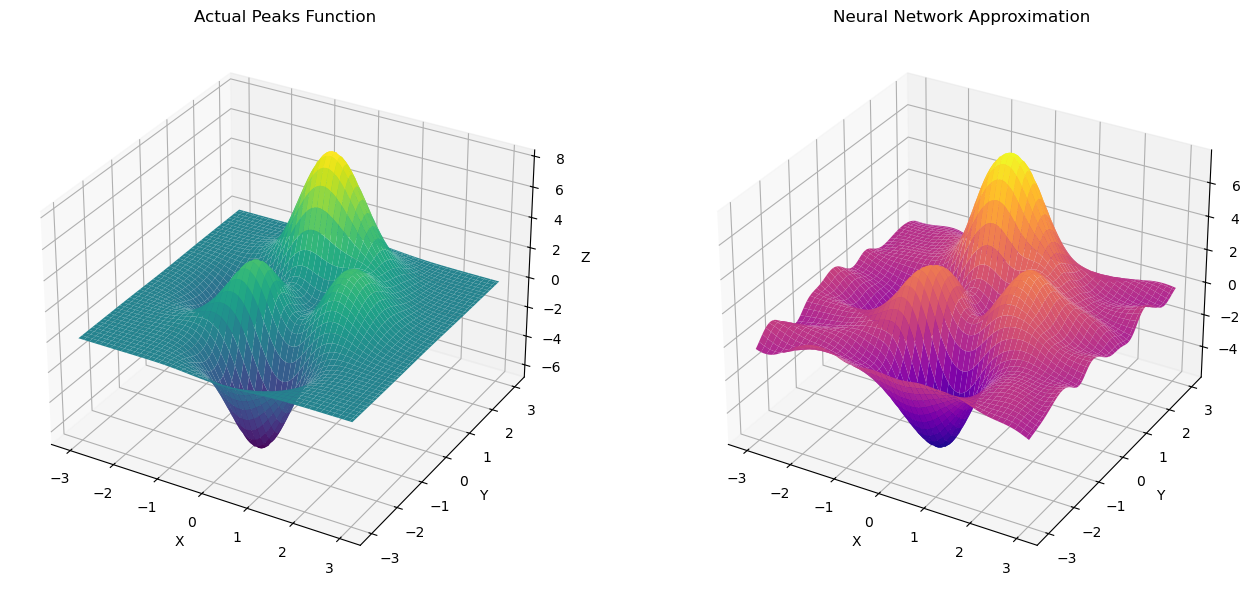

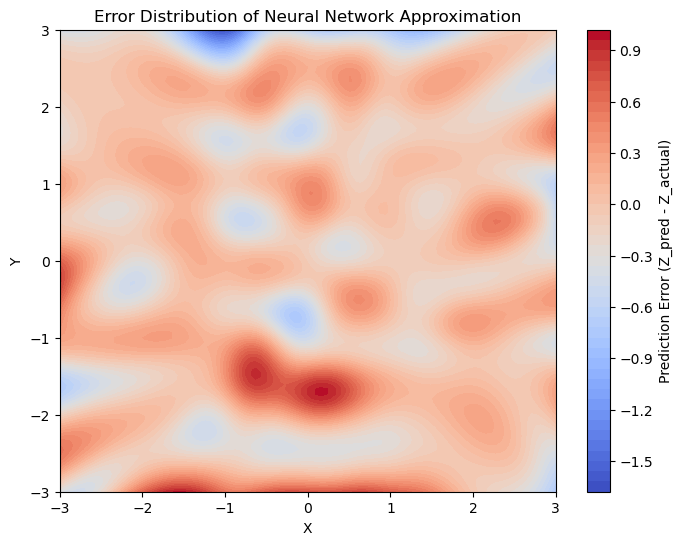

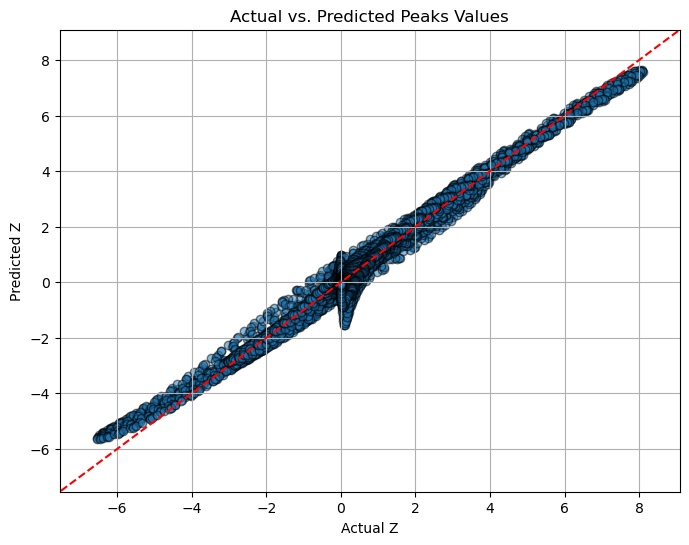

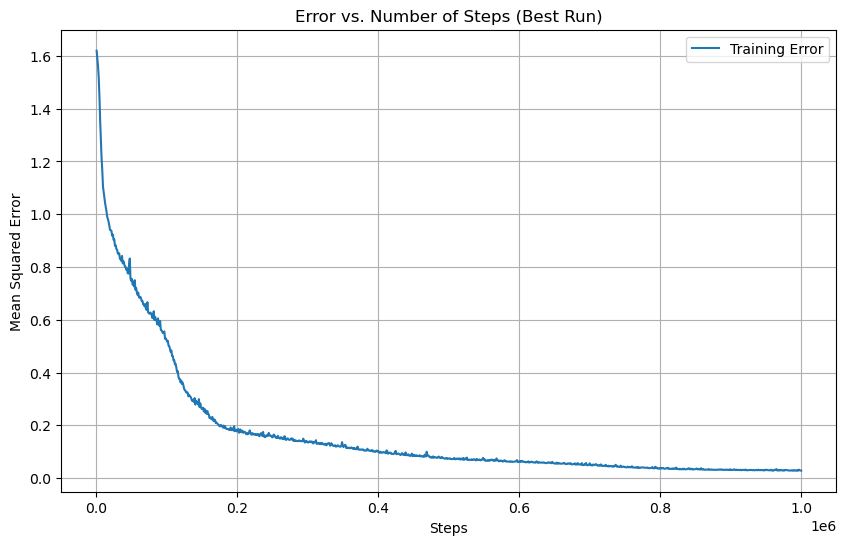

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def peaks(x, y):
    term1 = 3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
    term2 = -10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term3 = -1/3 * np.exp(-(x + 1)**2 - y**2)
    return term1 + term2 + term3

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * 0.1  # Input to Hidden
    W2 = np.random.randn(hidden_size, output_size) * 0.1 # Hidden to Output
    return W1, W2

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_pass(x, W1, W2):
    z1 = np.dot(x, W1)      # Input to Hidden
    a1 = tanh(z1)           # Activation Hidden
    z2 = np.dot(a1, W2)     # Hidden to Output
    a2 = z2                  # Linear activation for output
    return a1, a2

def backward_pass(x, y, a1, a2, W2, W1):
    delta2 = a2 - y  # Derivative of error w.r.t output
    dW2 = a1[:, np.newaxis] * delta2  # Gradient for W2
    
    # Compute derivative w.r.t hidden layer
    delta1 = (delta2 * W2.flatten()) * tanh_derivative(np.dot(x, W1))
    dW1 = np.outer(x, delta1)    # Gradient for W1
    
    return dW1, dW2

def train_one_run(X_train, y_train, hidden_size=100, eta=0.001, iterations=1000000, sample_interval=1000):
    input_size = X_train.shape[1]  # 3 (x, y, bias)
    output_size = 1
    
    # Initialize weights
    W1, W2 = initialize_weights(input_size, hidden_size, output_size)
    
    # To store error history
    error_history = []
    steps_recorded = []
    
    for step in range(1, iterations + 1):
        # Randomly select a single sample
        idx = np.random.randint(0, X_train.shape[0])
        x_sample = X_train[idx]
        y_sample = y_train[idx]
    
        # Forward pass
        a1, a2 = forward_pass(x_sample, W1, W2)
    
        # Compute error (Mean Squared Error)
        error = 0.5 * (a2 - y_sample)**2
    
        # Backward pass
        dW1, dW2 = backward_pass(x_sample, y_sample, a1, a2, W2, W1)
    
        # Update weights
        W2 -= eta * dW2
        W1 -= eta * dW1
    
        # Record error at specified intervals
        if step % sample_interval == 0:
            # Compute total error on the training set
            z1_train = np.dot(X_train, W1)  # Shape: (sample_size, hidden_size)
            a1_train = tanh(z1_train)
            z2_train = np.dot(a1_train, W2)  # Shape: (sample_size, 1)
            a2_train = z2_train.flatten()
            total_error = 0.5 * np.mean((a2_train - y_train)**2)
            error_history.append(total_error)
            steps_recorded.append(step)
            if step % (sample_interval * 100) == 0:
                print(f"Step {step}, Error: {total_error}")
    
    final_error = error_history[-1] if error_history else None
    return W1, W2, error_history, steps_recorded, final_error

def evaluate_and_plot(W1, W2, peaks_func, grid_size=100):
    # Create a dense grid for visualization
    X_grid, Y_grid = np.meshgrid(np.linspace(-3, 3, grid_size), np.linspace(-3, 3, grid_size))
    Z_actual = peaks_func(X_grid, Y_grid)
    
    # Prepare inputs with bias term (constant 1)
    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    bias = np.ones_like(X_flat)  # Bias term
    inputs = np.column_stack((X_flat, Y_flat, bias))  # Shape: (grid_size**2, 3)
    
    # Forward pass for all inputs without separate bias vectors
    z1_grid = np.dot(inputs, W1)       # Shape: (grid_size**2, hidden_size)
    a1_grid = tanh(z1_grid)            # Activation Hidden
    z2_grid = np.dot(a1_grid, W2)      # Shape: (grid_size**2, 1)
    Z_pred = z2_grid.reshape(X_grid.shape)  # Shape: (grid_size, grid_size)
    
    # Plot Actual Peaks
    fig = plt.figure(figsize=(14, 6))
    
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X_grid, Y_grid, Z_actual, cmap='viridis')
    ax1.set_title('Actual Peaks Function')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # Plot Neural Network Approximation
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X_grid, Y_grid, Z_pred, cmap='plasma')
    ax2.set_title('Neural Network Approximation')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    plt.tight_layout()
    plt.show()
    
    # Compute error on the grid
    error_grid = Z_pred - Z_actual
    
    # Plot Error Distribution
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X_grid, Y_grid, error_grid, levels=50, cmap='coolwarm')
    plt.colorbar(contour, label='Prediction Error (Z_pred - Z_actual)')
    plt.title('Error Distribution of Neural Network Approximation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    # Scatter Plot of Actual vs. Predicted Values
    plt.figure(figsize=(8, 6))
    plt.scatter(Z_actual.flatten(), Z_pred.flatten(), alpha=0.5, edgecolor='k')
    plt.xlabel('Actual Z')
    plt.ylabel('Predicted Z')
    plt.title('Actual vs. Predicted Peaks Values')
    plt.plot([-10, 10], [-10, 10], 'r--')  # Diagonal line for reference
    plt.grid(True)
    plt.xlim(min(Z_actual.min(), Z_pred.min()) - 1, max(Z_actual.max(), Z_pred.max()) + 1)
    plt.ylim(min(Z_actual.min(), Z_pred.min()) - 1, max(Z_actual.max(), Z_pred.max()) + 1)
    plt.show()

def run_multiple_training_runs(X_train, y_train, hidden_size=100, eta=0.001, iterations=1000000, sample_interval=1000, num_runs=100):
    """
    Runs the training process multiple times and selects the run with the lowest error.
    
    Parameters:
        X_train (ndarray): Training inputs (including bias).
        y_train (ndarray): Training outputs.
        hidden_size (int): Number of neurons in the hidden layer.
        eta (float): Learning rate.
        iterations (int): Number of training iterations per run.
        sample_interval (int): Interval to record error.
        num_runs (int): Number of training runs.
        
    Returns:
        best_W1 (ndarray): Weights from input to hidden layer of the best run.
        best_W2 (ndarray): Weights from hidden to output layer of the best run.
        best_error_history (list): Error history of the best run.
        best_steps (list): Steps at which errors were recorded for the best run.
        best_final_error (float): Final error of the best run.
    """
    best_final_error = np.inf
    best_W1 = None
    best_W2 = None
    best_error_history = []
    best_steps = []
    
    for run in range(1, num_runs + 1):
        print(f"\nStarting Run {run}/{num_runs}")
        W1, W2, error_history, steps_recorded, final_error = train_one_run(
            X_train, y_train,
            hidden_size=hidden_size,
            eta=eta,
            iterations=iterations,
            sample_interval=sample_interval
        )
        
        print(f"Run {run} completed with final error: {final_error}")
        
        if final_error < best_final_error:
            best_final_error = final_error
            best_W1 = W1.copy()
            best_W2 = W2.copy()
            best_error_history = error_history.copy()
            best_steps = steps_recorded.copy()
            print(f"Run {run} is the new best with error: {best_final_error}")
    
    print(f"\nAll runs completed. Best run has final error: {best_final_error}")
    return best_W1, best_W2, best_error_history, best_steps, best_final_error



def main():
    # Generate a grid of points
    A = np.linspace(-3, 3, 1000)
    X, Y = np.meshgrid(A, A)
    Z = peaks(X, Y)
    
    # Flatten the grid and sample 1000 points
    data = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))
    np.random.shuffle(data)
    sample_size = 1000
    train_data = data[:sample_size]
    X_train = train_data[:, 0:2]  # Inputs: x and y
    y_train = train_data[:, 2]     # Outputs: z
    
    # Add bias term to inputs
    X_train = np.hstack((X_train, np.ones((sample_size, 1))))  # Adding a bias input
    
    # Training parameters
    hidden_size = 100        # Number of neurons in the hidden layer
    eta = 0.001              # Learning rate
    iterations = 1000000     # Total number of training steps per run
    sample_interval = 1000   # Interval to record error
    num_runs = 100           # Number of training runs
    
    # Run multiple trainings and get the best model
    best_W1, best_W2, best_error_history, best_steps, best_final_error = run_multiple_training_runs(
        X_train, y_train,
        hidden_size=hidden_size,
        eta=eta,
        iterations=iterations,
        sample_interval=sample_interval,
        num_runs=num_runs
    )
    
    # Evaluate and plot the best model
    evaluate_and_plot(best_W1, best_W2, peaks)
    
    # Plot Error vs. Steps for the best model
    plt.figure(figsize=(10, 6))
    plt.plot(best_steps, best_error_history, label='Training Error')
    plt.xlabel('Steps')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs. Number of Steps (Best Run)')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
